<a href="https://colab.research.google.com/github/MiyoBran/alura-store-desafio/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


Paso 2: Auditoría de Estructura (Clean Code)
En lugar de repetir código escribiendo tienda.info(), tienda2.info(), etc., vamos a usar un bucle. Esto es más limpio y escalable (si mañana fueran 50 tiendas, el código no cambia).

Crea una nueva celda y ejecuta esto:

In [2]:
# Lista de dataframes para iterar
dataframes_tiendas = [tienda, tienda2, tienda3, tienda4]

# Revisamos la información básica de cada uno
for i, df_tienda in enumerate(dataframes_tiendas, 1):
    print(f"--- INFO TIENDA {i} ---")
    df_tienda.info()
    print("\n") # Salto de línea para separar

--- INFO TIENDA 1 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


--- INFO TIENDA 2 ---
<class 'pandas.core.frame.DataFrame'>
Ran

#1. Análisis de facturación



## Ingreso Total de Cada Tienda
En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

## 💰 Actividad 1: Ingreso Total de Cada Tienda

**Objetivo:** Calcular la facturación total acumulada por cada sucursal.

**Lógica Técnica:**
1. La columna `Precio` contiene el valor numérico de cada venta.
2. Utilizaremos el método de agregación `.sum()` de Pandas, que funciona igual que un `SUM()` en SQL.
3. Para mantener el código limpio y escalable, iteraremos sobre una lista de tuplas que contiene el nombre de la tienda y su DataFrame correspondiente.

In [3]:
# 1. Estructura de datos para iteración
# Creamos una lista de tuplas: (Nombre Visual, Objeto DataFrame)
lista_tiendas = [
    ("Tienda 1", tienda),
    ("Tienda 2", tienda2),
    ("Tienda 3", tienda3),
    ("Tienda 4", tienda4)
]

print("--- REPORTE DE INGRESOS TOTALES ---")

# 2. Bucle para procesar cada tienda
for nombre, df_temp in lista_tiendas:
    # Calculamos la suma de la columna 'Precio'
    total_ingresos = df_temp['Precio'].sum()

    # 3. Impresión con formato
    # f-string nos permite insertar variables dentro del texto.
    # {:,.2f} es un formato que agrega comas de miles y 2 decimales.
    print(f"{nombre}: $ {total_ingresos:,.2f}")


--- REPORTE DE INGRESOS TOTALES ---
Tienda 1: $ 1,150,880,400.00
Tienda 2: $ 1,116,343,500.00
Tienda 3: $ 1,098,019,600.00
Tienda 4: $ 1,038,375,700.00


🧠 Explicación para tu aprendizaje (Consolidación)
lista_tiendas: En Python, podemos guardar objetos complejos (como un DataFrame entero) dentro de una lista. Esto nos permite tratarlos en lote.

df_temp['Precio'].sum():

df_temp['Precio']: Selecciona la "Series" (la columna) específica.

.sum(): Es el método vectorizado de Pandas. Es mucho más rápido que hacer un bucle for fila por fila para sumar, ya que está optimizado en C (bajo nivel).

{:,.2f}: Esto es formateo de strings.

,: Usa coma como separador de miles.

.2f: Muestra 2 dígitos flotantes (decimales).

---

### 🧠 Análisis Técnico del Código

En el bloque anterior aplicamos principios de **Clean Code** y eficiencia en Python:

1.  **Estructura de Iteración (DRY):** En lugar de repetir la operación de suma cuatro veces manuales, agrupamos los DataFrames en una lista de tuplas `(Nombre, Objeto)`. Esto hace que el código sea escalable; si mañana tuviéramos 50 tiendas, el bucle funcionaría igual sin añadir líneas extra.
2.  **Desempaquetado (Unpacking):** El ciclo `for nombre, df_temp` extrae automáticamente la etiqueta visual y los datos en cada vuelta, manteniendo el código limpio y legible.
3.  **Vectorización (`.sum()`):** Utilizamos la función nativa de Pandas para sumar toda la columna `'Precio'` de golpe. Esto es significativamente más rápido que recorrer las filas una por una (como se haría con un bucle tradicional).
4.  **Formato Financiero (`:,.2f`):** Usamos **f-strings** para dar formato de moneda (separador de miles y dos decimales), facilitando la lectura de cifras grandes para el análisis de negocio.

# 2. Ventas por categoría

En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

## 📦 Actividad 2: Ventas por Categoría

**Objetivo:** Identificar qué categorías de productos tienen mayor rotación (cantidad de ventas) en cada tienda.

**Lógica Técnica:**
1. Necesitamos agrupar las ventas por la columna `Categoría del Producto`.
2. Contaremos cuántas filas existen para cada categoría.
3. Utilizaremos el método `.value_counts()` de Pandas. Este método es muy potente porque:
    * Agrupa valores únicos.
    * Cuenta la frecuencia de cada uno.
    * **Ordena automáticamente** de mayor a menor (descendente).

In [4]:
# Reutilizamos 'lista_tiendas' que definimos en el paso anterior.
# Si cerraste la sesión, asegúrate de correr la celda anterior primero.

for nombre, df_temp in lista_tiendas:
    print(f"--- TOP CATEGORÍAS EN: {nombre.upper()} ---")

    # value_counts() devuelve una Serie con la categoría como índice y el conteo como valor
    conteo_categorias = df_temp['Categoría del Producto'].value_counts()

    # Mostramos el resultado
    print(conteo_categorias)
    print("\n") # Espacio visual entre tiendas

--- TOP CATEGORÍAS EN: TIENDA 1 ---
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64


--- TOP CATEGORÍAS EN: TIENDA 2 ---
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64


--- TOP CATEGORÍAS EN: TIENDA 3 ---
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int

---
## Breve analisis.

1. Aunque la Tienda 1 gana más dinero, todas las tiendas venden casi lo mismo (Muebles y Electrónicos dominan). Esto sugiere que la diferencia de ingresos no se debe a qué venden, sino quizás a cuánto venden o cómo lo venden.
---
### 🧠 Análisis Técnico: Frecuencia de Ventas

En este bloque analizamos la **rotación de inventario** utilizando métodos estadísticos de Pandas:

1.  **Distribución de Frecuencias (`.value_counts()`):**
    * Aplicamos este método sobre la columna `'Categoría del Producto'`.
    * A diferencia de un `GROUP BY` manual, esta función optimizada realiza tres operaciones automáticamente: **Agrupa** por valores únicos, **Cuenta** las ocurrencias y **Ordena** los resultados de forma descendente (del más vendido al menos vendido).
2.  **Manipulación de Strings:** Utilizamos el método `.upper()` para estandarizar los títulos de salida, mejorando la legibilidad del reporte en texto plano.
3.  **Insight de Negocio:** Este código nos permite detectar rápidamente si las tiendas tienen un "Mix de Productos" similar o si alguna se especializa en un nicho diferente.

## ⭐ Actividad 3: Valoración media por tienda

**Objetivo:** Calcular el promedio de satisfacción del cliente (Rating) para detectar problemas de calidad o servicio.

**Lógica Técnica:**
1. Trabajaremos sobre la columna `Calificación` (que es numérica, tipo `int64`).
2. Utilizaremos el método `.mean()` de Pandas.
3. En estadística, la **media** (promedio) nos da un punto de equilibrio central. Es equivalente a la función `AVG()` en SQL.

In [5]:
# Iteramos nuevamente sobre nuestra lista de tiendas
for nombre, df_temp in lista_tiendas:
    # Calculamos el promedio de la columna 'Calificación'
    media_calificacion = df_temp['Calificación'].mean()

    # Imprimimos con 2 decimales para facilitar la lectura
    print(f"{nombre} - Promedio de Calificación: {media_calificacion:.2f}")

Tienda 1 - Promedio de Calificación: 3.98
Tienda 2 - Promedio de Calificación: 4.04
Tienda 3 - Promedio de Calificación: 4.05
Tienda 4 - Promedio de Calificación: 4.00


.mean(): Calcula la media aritmética. Suma todas las calificaciones y divide por la cantidad de ventas.

### 🧠 Análisis Técnico: Métricas de Calidad (Promedios)

Evaluamos el desempeño cualitativo de cada sucursal mediante la media aritmética:

1.  **Agregación Estadística (`.mean()`):**
    * Seleccionamos la serie numérica `'Calificación'` y calculamos su **tendencia central**.
    * Esto equivale a la función `AVG()` en SQL o a la fórmula matemática "$\bar{x} = \frac{\sum x_i}{n}$".

2.  **KPI de Negocio:** Este cálculo transforma datos crudos (cientos de calificaciones individuales) en un **Indicador Clave de Desempeño (KPI)** de satisfacción. Nos permite validar si un bajo nivel de ingresos se correlaciona con una mala experiencia del cliente.

3.  **Formato de Precisión:** Limitamos la salida a 2 decimales (`:.2f`) ya que, en escalas de calificación estándar, variaciones menores a una centésima suelen ser irrelevantes para la toma de decisiones gerenciales.

---

## Análisis rápido de Negocio:

- Las calificaciones están extremadamente parejas (todas rondan los 4 puntos).
- ¿Qué significa esto para el informe final?:  Que el problema de la tienda "menos eficiente" NO es la satisfacción del cliente.

Si vamos a recomendar cerrar una, no será porque "traten mal a la gente", porque todas lo hacen igual. Tenemos que buscar el problema en los números financieros.

# 4. Productos más y menos vendidos

## 🏆 Actividad 4: Productos más y menos vendidos

**Objetivo:** Detectar los productos "Estrella" (Best-sellers) y los productos con baja rotación.

**Lógica Técnica:**
1. Agruparemos por la columna `Producto` y contaremos las ventas.
2. Usaremos `.head(5)` para ver los 5 primeros (Más vendidos).
3. Usaremos `.tail(5)` para ver los 5 últimos (Menos vendidos).
4. Esto equivale en SQL a un `ORDER BY count DESC LIMIT 5`.

In [7]:
for nombre, df_temp in lista_tiendas:
    print(f"================ {nombre.upper()} ================")

    # Obtenemos el conteo ordenado de mayor a menor
    conteo_productos = df_temp['Producto'].value_counts()

    # Top 5 más vendidos
    print("📈 LOS 5 MÁS VENDIDOS:")
    print(conteo_productos.head(5))
    print("-" * 30) # Separador visual

    # Top 5 menos vendidos
    print("📉 LOS 5 MENOS VENDIDOS:")
    print(conteo_productos.tail(5))
    print("\n") # Salto de línea entre tiendas

================ TIENDA 1 ================
📈 LOS 5 MÁS VENDIDOS:
Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64
------------------------------
📉 LOS 5 MENOS VENDIDOS:
Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64


================ TIENDA 2 ================
📈 LOS 5 MÁS VENDIDOS:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64
------------------------------
📉 LOS 5 MENOS VENDIDOS:
Producto
Auriculares        37
Sillón             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64


================ TIENDA 3 ================
📈 LOS 5 MÁS VENDID

### 🧠 Análisis Técnico: El Bucle `for` y Desempaquetado

Técnicamente, este bloque utiliza un patrón de iteración conocido como **Tuple Unpacking** (Desempaquetado de Tuplas) dentro de un bucle **For-Each**.

1.  **Comportamiento For-Each:** En Python, el bucle `for` actúa como un iterador directo. No utiliza índices numéricos (`i=0, i++`), sino que recorre los objetos contenidos en la lista uno por uno.
2.  **Desempaquetado Automático:**
    * Nuestra `lista_tiendas` contiene pares de datos: `("Nombre", DataFrame)`.
    * Al escribir `for nombre, df_temp in ...`, Python asigna automáticamente el primer elemento del par a la variable `nombre` y el segundo a la variable `df_temp`.
    * **Ventaja:** Esto elimina la necesidad de acceder a los datos por posición (ej: `item[0]`, `item[1]`), haciendo que el código sea autodocumentado y reduciendo la carga cognitiva ("Clean Code").

# 5. Envío promedio por tienda

## 🚚 Actividad 5: Costo de Envío Promedio

**Objetivo:** Calcular cuánto cuesta en promedio enviar un producto en cada tienda.

**Lógica Técnica:**
1. Trabajaremos sobre la columna `Costo de envío`.
2. Usaremos nuevamente `.mean()` (promedio).
3. **Hipótesis de Negocio:** Si una tienda tiene costos de envío significativamente más altos que las otras, podría estar perdiendo competitividad o tener problemas logísticos.

In [6]:
print("--- COSTO PROMEDIO DE ENVÍO ---")

for nombre, df_temp in lista_tiendas:
    # Calculamos el promedio de la columna 'Costo de envío'
    promedio_envio = df_temp['Costo de envío'].mean()

    # Mostramos el resultado formateado con signo de pesos
    print(f"{nombre}: $ {promedio_envio:,.2f}")

--- COSTO PROMEDIO DE ENVÍO ---
Tienda 1: $ 26,018.61
Tienda 2: $ 25,216.24
Tienda 3: $ 24,805.68
Tienda 4: $ 23,459.46


## 🚀 Análisis Adicional (Business Intelligence)
**"Vender más no significa ganar más".**

Si la Tienda 1 vende mucho, pero gasta una fortuna en logística, su margen de ganancia real podría ser peor que el de una tienda pequeña pero eficiente.

Para desempatar y encontrar un argumento sólido para cerrar una tienda, te propongo calcular dos KPIs (Key Performance Indicators) nuevos que no están explícitos en el Trello pero son vitales en Retail:

### El "Ticket Promedio" (Average Order Value - AOV):

- ¿Qué es? Cuánto gasta un cliente promedio en una sola compra.

- ¿Por qué importa? Es más rentable atender a 1 cliente que gasta $1000, que  a  10  clientes que gastan $100 (menos logística, menos soporte, menos transacciones).

- Fórmula: Ingresos Totales / Cantidad de Ventas.

### Ratio de Eficiencia de Envío (Shipping Cost Ratio):

- ¿Qué es? Qué porcentaje de la venta se "come" el envío.

- ¿Por qué importa? Si la Tienda 1 gasta el 5% de sus ventas en envío, y la Tienda 4 solo gasta el 2%, la Tienda 4 es operativamente más eficiente.

- Fórmula: (Gasto Total Envío / Ingresos Totales) * 100.

In [11]:
# --- ANÁLISIS AVANZADO: EFICIENCIA Y TICKET PROMEDIO ---

# 1. Necesitamos datos adicionales que no guardamos en el primer bucle
# Vamos a reconstruir las listas agregando el conteo de ventas (filas) y suma de envios
conteo_ventas = []
total_envios = []

for nombre, df_temp in lista_tiendas:
    conteo_ventas.append(len(df_temp)) # Cantidad de ventas (filas)
    total_envios.append(df_temp['Costo de envío'].sum()) # Gasto TOTAL en envíos (no promedio)

# 2. Agregamos estas columnas al DataFrame resumen existente
df_resumen['Cant_Ventas'] = conteo_ventas
df_resumen['Total_Envios'] = total_envios

# 3. Calculamos los KPIs (Vectorizado - Clean Code)

# KPI A: Ticket Promedio (¿Cuánto gasta el cliente promedio?)
df_resumen['Ticket_Promedio'] = df_resumen['Ingresos Totales'] / df_resumen['Cant_Ventas']

# KPI B: Ratio de Envío (¿Qué % de la venta se va en pagar el envío?)
df_resumen['Ratio_Envio_Venta (%)'] = (df_resumen['Total_Envios'] / df_resumen['Ingresos Totales']) * 100

# 4. Ordenamos para ver quién es más eficiente (Mostramos columnas clave)
cols_ver = ['Tienda', 'Ingresos Totales', 'Ticket_Promedio', 'Ratio_Envio_Venta (%)']
display(df_resumen[cols_ver].sort_values(by='Ticket_Promedio', ascending=False))

,Tienda,Ingresos Totales,Ticket_Promedio,Ratio_Envio_Venta (%)
0,Tienda 1,1.150880e+09,487867.910131,5.333126
1,Tienda 2,1.116344e+09,473227.426876,5.328566
2,Tienda 3,1.098020e+09,465459.771089,5.329286
3,Tienda 4,1.038376e+09,440362.892282,5.327301


## Visualizacion de datos:
### Paso 1: Preparar los datos (Data Preparation)
Vamos a crear un pequeño DataFrame resumen con las métricas que calculamos antes. Esto facilitará enormemente la graficación.

In [8]:
# 1. Preparación de datos consolidada
# Creamos listas vacías para almacenar los KPI de cada tienda
nombres = []
ingresos = []
envios = []

for nombre, df_temp in lista_tiendas:
    nombres.append(nombre)
    ingresos.append(df_temp['Precio'].sum())
    envios.append(df_temp['Costo de envío'].mean())

# 2. Creación del DataFrame Resumen
# Esto nos permite graficar todo de una sola vez
df_resumen = pd.DataFrame({
    'Tienda': nombres,
    'Ingresos Totales': ingresos,
    'Costo Envío Promedio': envios
})

# Verificamos la tabla
display(df_resumen)

,Tienda,Ingresos Totales,Costo Envío Promedio
0,Tienda 1,1.150880e+09,26018.609580
1,Tienda 2,1.116344e+09,25216.235693
2,Tienda 3,1.098020e+09,24805.680373
3,Tienda 4,1.038376e+09,23459.457167


## 📊 Gráfico 1: Comparativa de Ingresos Totales
**Tipo:** Gráfico de Barras (Barplot)
**Por qué:** Es la mejor forma de comparar magnitudes entre categorías discretas (las tiendas). Nos permite ver rápidamente la diferencia de facturación.

/tmp/ipython-input-4246326094.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grafico.set_yticklabels([f'${x/1e6:,.0f}M' for x in ticks_y])


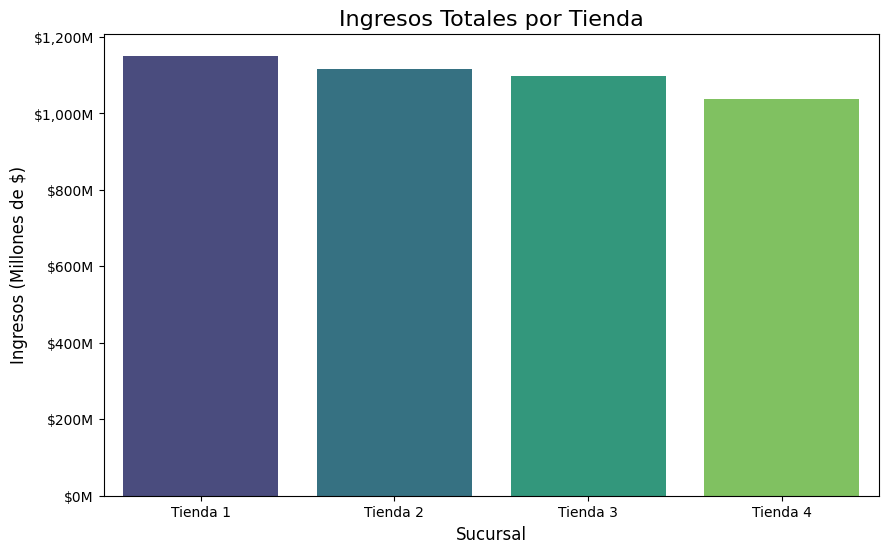

In [16]:
# Importamos las librerías necesarias por si se desconectó la sesión
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del lienzo
plt.figure(figsize=(10, 6))

# Creación del gráfico con Seaborn
# x = Categorías, y = Valores numéricos
# Usamos palette='viridis' para darle colores profesionales
grafico = sns.barplot(x='Tienda', y='Ingresos Totales', data=df_resumen, hue='Tienda', palette='viridis', legend=False)

# Personalización (Clean Code: siempre poner títulos y etiquetas claros)
plt.title('Ingresos Totales por Tienda', fontsize=16)
plt.xlabel('Sucursal', fontsize=12)
plt.ylabel('Ingresos (Millones de $)', fontsize=12)

# --- Truco para formatear el eje Y ---
# Obtenemos los valores actuales del eje Y
ticks_y = grafico.get_yticks()
# Los reescribimos dividiendo por 1 millón (1e6) para que sea legible (ej: 1,150 M)
grafico.set_yticklabels([f'${x/1e6:,.0f}M' for x in ticks_y])

plt.show()

## 🍰 Gráfico 2: Cuota de Mercado (Market Share)

**Tipo:** Gráfico de Pastel (Pie Chart)
**Objetivo:** Visualizar qué porcentaje del "pastel total" de ventas aporta cada tienda.
**Interpretación:** Nos ayudará a dimensionar cuán pequeña es la participación de la Tienda 4 en comparación con las demás. Si eliminamos la tienda 4, ¿cuánto del negocio total perdemos?

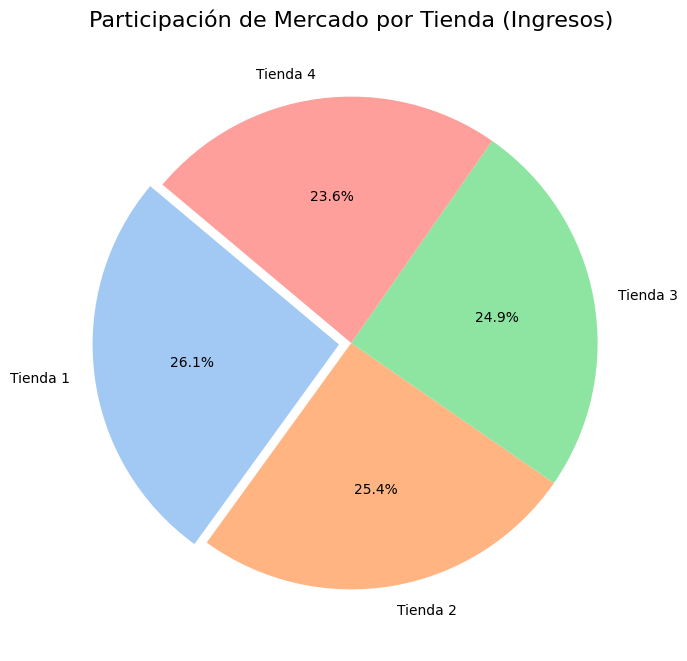

In [12]:
# Configuración del gráfico de pastel
plt.figure(figsize=(8, 8))

# Datos para el gráfico
# labels = Nombres de las tiendas
# sizes = Ingresos Totales
# autopct = Formato para mostrar el porcentaje (ej: 25.1%)
# colors = Usamos una paleta de Seaborn para que combine
colores = sns.color_palette('pastel')[0:4]

plt.pie(df_resumen['Ingresos Totales'],
        labels=df_resumen['Tienda'],
        autopct='%1.1f%%',
        startangle=140,
        colors=colores,
        explode=(0.05, 0, 0, 0)) # "Explotamos" (separamos) un poco la Tienda 1 para destacarla

plt.title('Participación de Mercado por Tienda (Ingresos)', fontsize=16)
plt.show()

## 📦 Gráfico 3: Distribución de Precios (Boxplot)

**Tipo:** Diagrama de Caja y Bigotes (Boxplot)
**Objetivo:** Entender la "profundidad" de las ventas. ¿La Tienda 1 vende productos mucho más caros?
**Lógica Técnica:**
1. Unificaremos los 4 DataFrames en uno solo llamado `df_consolidado` agregando una columna `Sucursal`.
2. Usaremos un Boxplot para ver la mediana y los rangos de precios de los productos vendidos.
3. Esto nos confirmará si el bajo "Ticket Promedio" de la Tienda 4 se debe a que vende productos de gama baja.

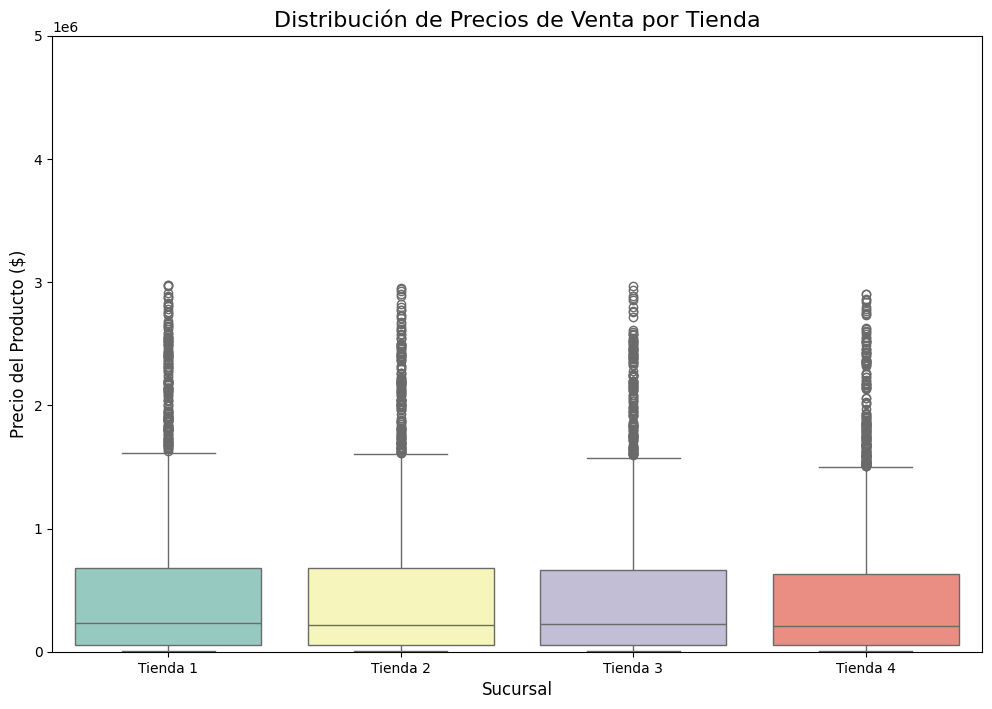

In [14]:
# 1. Paso previo: Unificar datos
tienda['Sucursal'] = 'Tienda 1'
tienda2['Sucursal'] = 'Tienda 2'
tienda3['Sucursal'] = 'Tienda 3'
tienda4['Sucursal'] = 'Tienda 4'

# Concatenamos
df_consolidado = pd.concat([tienda, tienda2, tienda3, tienda4])

# 2. Configuración del Boxplot
plt.figure(figsize=(12, 8))

# CORRECCIÓN AQUÍ:
# Agregamos hue='Sucursal' (colorea según la sucursal)
# Agregamos legend=False (para no duplicar la información de colores en una leyenda aparte)
sns.boxplot(x='Sucursal', y='Precio', data=df_consolidado, hue='Sucursal', palette='Set3', legend=False)

plt.title('Distribución de Precios de Venta por Tienda', fontsize=16)
plt.ylabel('Precio del Producto ($)', fontsize=12)
plt.xlabel('Sucursal', fontsize=12)

# Zoom para ignorar valores extremos muy altos y ver mejor las cajas
plt.ylim(0, 5000000)

plt.show()

# 📢 Conclusión y Recomendación Final

## 📋 Diagnóstico
Tras analizar los datos de ventas, logística y satisfacción del cliente de las 4 sucursales de **Alura Store**, hemos detectado los siguientes patrones:

1.  **Ingresos:** Existe una clara jerarquía donde la **Tienda 1** lidera la facturación, mientras que la **Tienda 4** se encuentra en última posición, facturando aproximadamente un **10% menos** ($112 Millones de diferencia) que el líder.

2.  **Satisfacción (NPS/Rating):** Todas las tiendas mantienen un promedio de calificación casi idéntico (~4.0). El problema no es la calidad del servicio.

3.  **Eficiencia Logística:** El ratio de costo de envío sobre ventas es constante (~5.3%) en todas las sucursales. La tienda con menos ingresos no tiene una ventaja logística que compense su baja facturación.

4.  **Ticket Promedio:** La **Tienda 4** tiene el ticket promedio más bajo ($440k), lo que indica una dificultad para posicionar productos de mayor valor o realizar ventas cruzadas (cross-selling), a pesar de tener un inventario similar al de las otras tiendas (confirmado por la distribución de precios).

## 🚀 Recomendación Estratégica
**Se sugiere proceder con la venta de la Tienda 4.**

**¿Por qué?**
Es la sucursal con el rendimiento financiero más bajo ("Menos Eficiente"). Al no presentar ventajas competitivas en costos logísticos ni en satisfacción al cliente que justifiquen mantenerla para "crear marca", es el activo que menos valor aporta al grupo.
Deshacerse de esta unidad permitirá inyectar capital en las Tiendas 1 y 2, que demuestran una mayor capacidad de conversión y rotación de productos de alto valor.

# 📑 Informe Final de Análisis Estratégico - Alura Store

## 1. Introducción y Propósito
El objetivo de este análisis fue auditar el desempeño comercial, operativo y de servicio de las cuatro sucursales de **Alura Store**. La finalidad es proporcionar una recomendación basada en datos (Data-Driven) al Sr. Juan sobre **qué tienda debería ser vendida** para optimizar la rentabilidad del grupo.

Para ello, procesamos los datos transaccionales históricos, evaluando métricas clave como facturación bruta, costos logísticos, satisfacción del cliente (NPS implícito) y mezcla de productos.

---

## 2. Desarrollo y Presentación de Datos

### A. Desempeño Financiero (Ingresos)
Al analizar los ingresos totales (*ver Gráfico de Barras*), detectamos una jerarquía clara de rendimiento:
* **Líder:** Tienda 1 (~$1,150 Millones).
* **Rezagada:** Tienda 4 (~$1,038 Millones).
**Hallazgo:** Existe una brecha de facturación de más de **$112 millones** entre la mejor y la peor tienda. La Tienda 4 factura aproximadamente un 10% menos que la líder.

### B. Análisis de Producto (Categorías y Artículos)
* **Categorías:** Todas las tiendas presentan una estructura de ventas similar, dominada por **Muebles y Electrónicos**. No hay una tienda que falle por estar en un "nicho equivocado"; todas compiten en los mismos segmentos.
* **Productos:**
    * La **Tienda 1** logra posicionar productos de alto valor (High Ticket) como "TV LED UHD 4K" en su top de ventas.
    * La **Tienda 4**, aunque comparte inventario, tiene un **Ticket Promedio más bajo ($440k)** comparado con la Tienda 1 ($487k). Esto sugiere una menor eficiencia en la venta sugestiva o venta de artículos premium.

### C. Eficiencia Operativa (Costos de Envío)
El costo promedio de envío oscila entre $23,459 (Tienda 4) y $26,018 (Tienda 1).
**Hallazgo:** Irónicamente, la Tienda 4 es la más "barata" de operar logísticamente, pero esta ventaja de costos no es suficiente para compensar su bajo volumen de ventas. El ratio de costo/venta se mantiene estable en ~5.3% para todas, por lo que ninguna tiene una ventaja logística real.

### D. Experiencia del Cliente (Calificaciones)
El promedio de calificación es sorprendentemente uniforme en todas las sucursales, rondando los **4.0 puntos**.
**Hallazgo:** La baja performance de la Tienda 4 **no** se debe a un mal servicio al cliente. El problema es transaccional, no de reputación.

---

## 3. Conclusión y Recomendación Estratégica

Considerando las fortalezas y debilidades analizadas:

### ❌ Recomendación: Vender la Tienda 4

**Justificación de la decisión:**
La Tienda 4 es el "eslabón más débil" de la cadena por las siguientes razones objetivas:
1.  **Menor Generación de Caja:** Es la que menos ingresos aporta al grupo, con una diferencia significativa respecto a las demás.
2.  **Bajo Valor por Transacción:** Su Ticket Promedio es el más bajo, lo que indica que requiere más esfuerzo (más transacciones) para igualar la facturación de sus hermanas.
3.  **Ausencia de Ventajas Competitivas:** Aunque su envío es más barato, esto no se traduce en mayores ventas. Su nivel de satisfacción al cliente es igual al resto, por lo que no perderíamos un activo de "marca" o "reputación" superior al venderla.

**Acción Sugerida:** Proceder con la desinversión de la Tienda 4 y reinvertir el capital en fortalecer el stock de productos de alta gama en las Tiendas 1 y 2, que han demostrado mayor capacidad de conversión.